## Step 1: Import necessary libaries

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlretrieve

## Step 2: Import the Dataset

In [2]:
# Assign url of file: url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# save file locally
urlretrieve(url, 'Iris.csv')

# Read file into a Dataframe and print its head
df = pd.read_csv("Iris.csv")
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


## Step 3: Dataset Overview

In [3]:
# Set the name of columns
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# Create ID column
df['ID'] = [i for i in range(1, 150)]

# Define the new order of olumns
new_order = ['ID', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# Reindex the dataframe with the new column order
df = df.reindex(columns=new_order )

df.head()

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4.9,3.0,1.4,0.2,Iris-setosa
1,2,4.7,3.2,1.3,0.2,Iris-setosa
2,3,4.6,3.1,1.5,0.2,Iris-setosa
3,4,5.0,3.6,1.4,0.2,Iris-setosa
4,5,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.shape

(149, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             149 non-null    int64  
 1   SepalLengthCm  149 non-null    float64
 2   SepalWidthCm   149 non-null    float64
 3   PetalLengthCm  149 non-null    float64
 4   PetalWidthCm   149 non-null    float64
 5   Species        149 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [11]:
# Get the description of the DataFrame and Round the number in the description to 2 decimal
df.describe().round(2)

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.00,149.00,149.00,149.00,149.00
mean,75.00,5.85,3.05,3.77,1.21
std,43.16,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.00,5.10,2.80,1.60,0.30
50%,75.00,5.80,3.00,4.40,1.30
75%,112.00,6.40,3.30,5.10,1.80
max,149.00,7.90,4.40,6.90,2.50


In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

In [12]:
df.isnull().sum()

ID               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 4: EDA

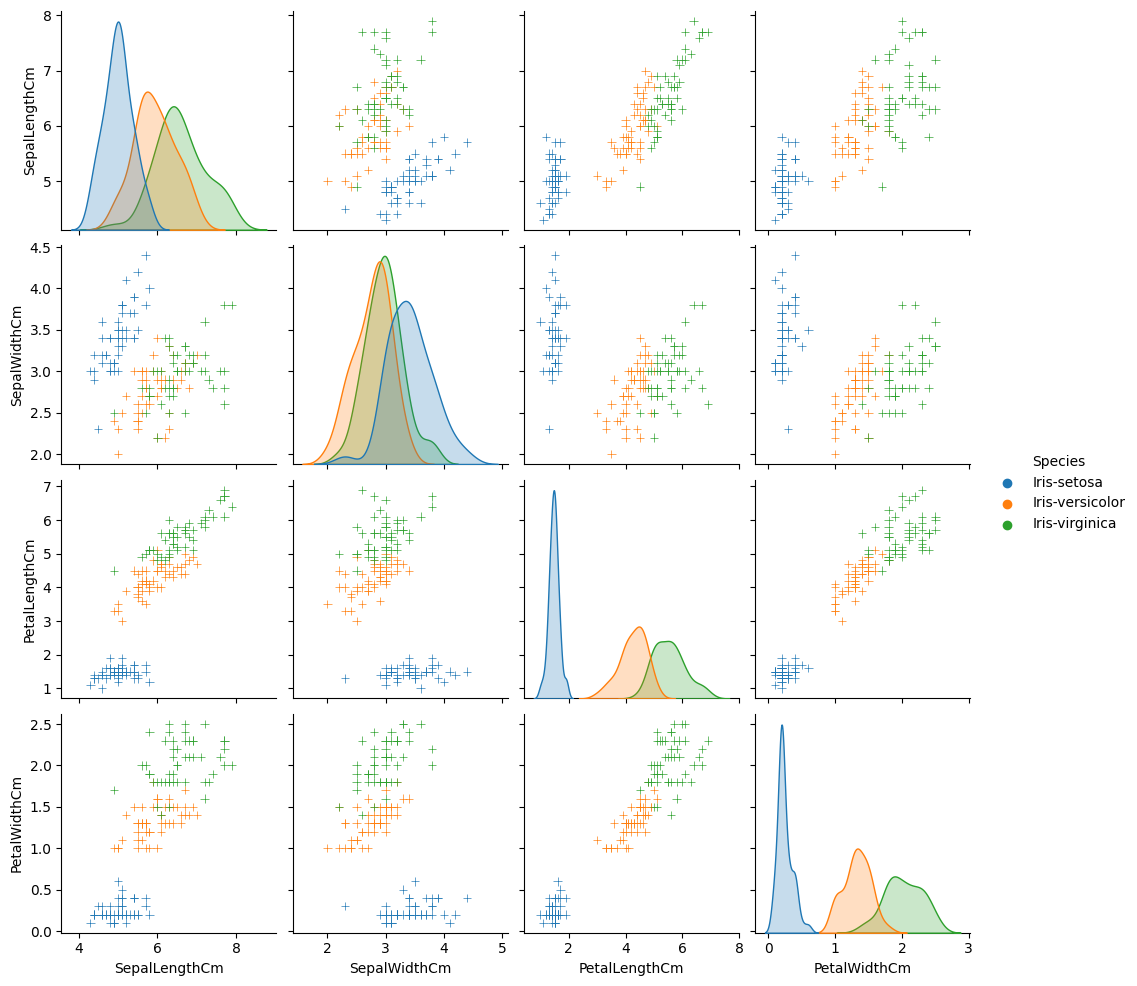

In [13]:
import warnings
warnings.filterwarnings('ignore')

t = df.drop("ID", axis=1)
df_drop = sns.pairplot(t, hue = 'Species', markers = '+')
plt.show()